<a href="https://colab.research.google.com/github/m-riddle-codes/ARA/blob/main/pd1pdl1_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will analyze a dataset of chemical compounds to evaluate their suitability as potential drug candidates. After checking each compound against Lipinski's Rule of Five and assessing the absence of PAINS and Brenk structural alerts, we will assign a composite score to each compound for further analysis. This score is derived from the compound's adherence to these criteria, with specific weights assigned to each criterion to reflect its relative importance.


---



# Learning Objectives
* Recall the process of uploading datasets into the notebook environment. If you’re unsure, take a moment to revisit previous materials or guides.
* Learn to evaluate chemical compounds against specific criteria like Lipinski's Rule of Five, and understand the implications of PAINS and Brenk structural alerts in drug discovery.


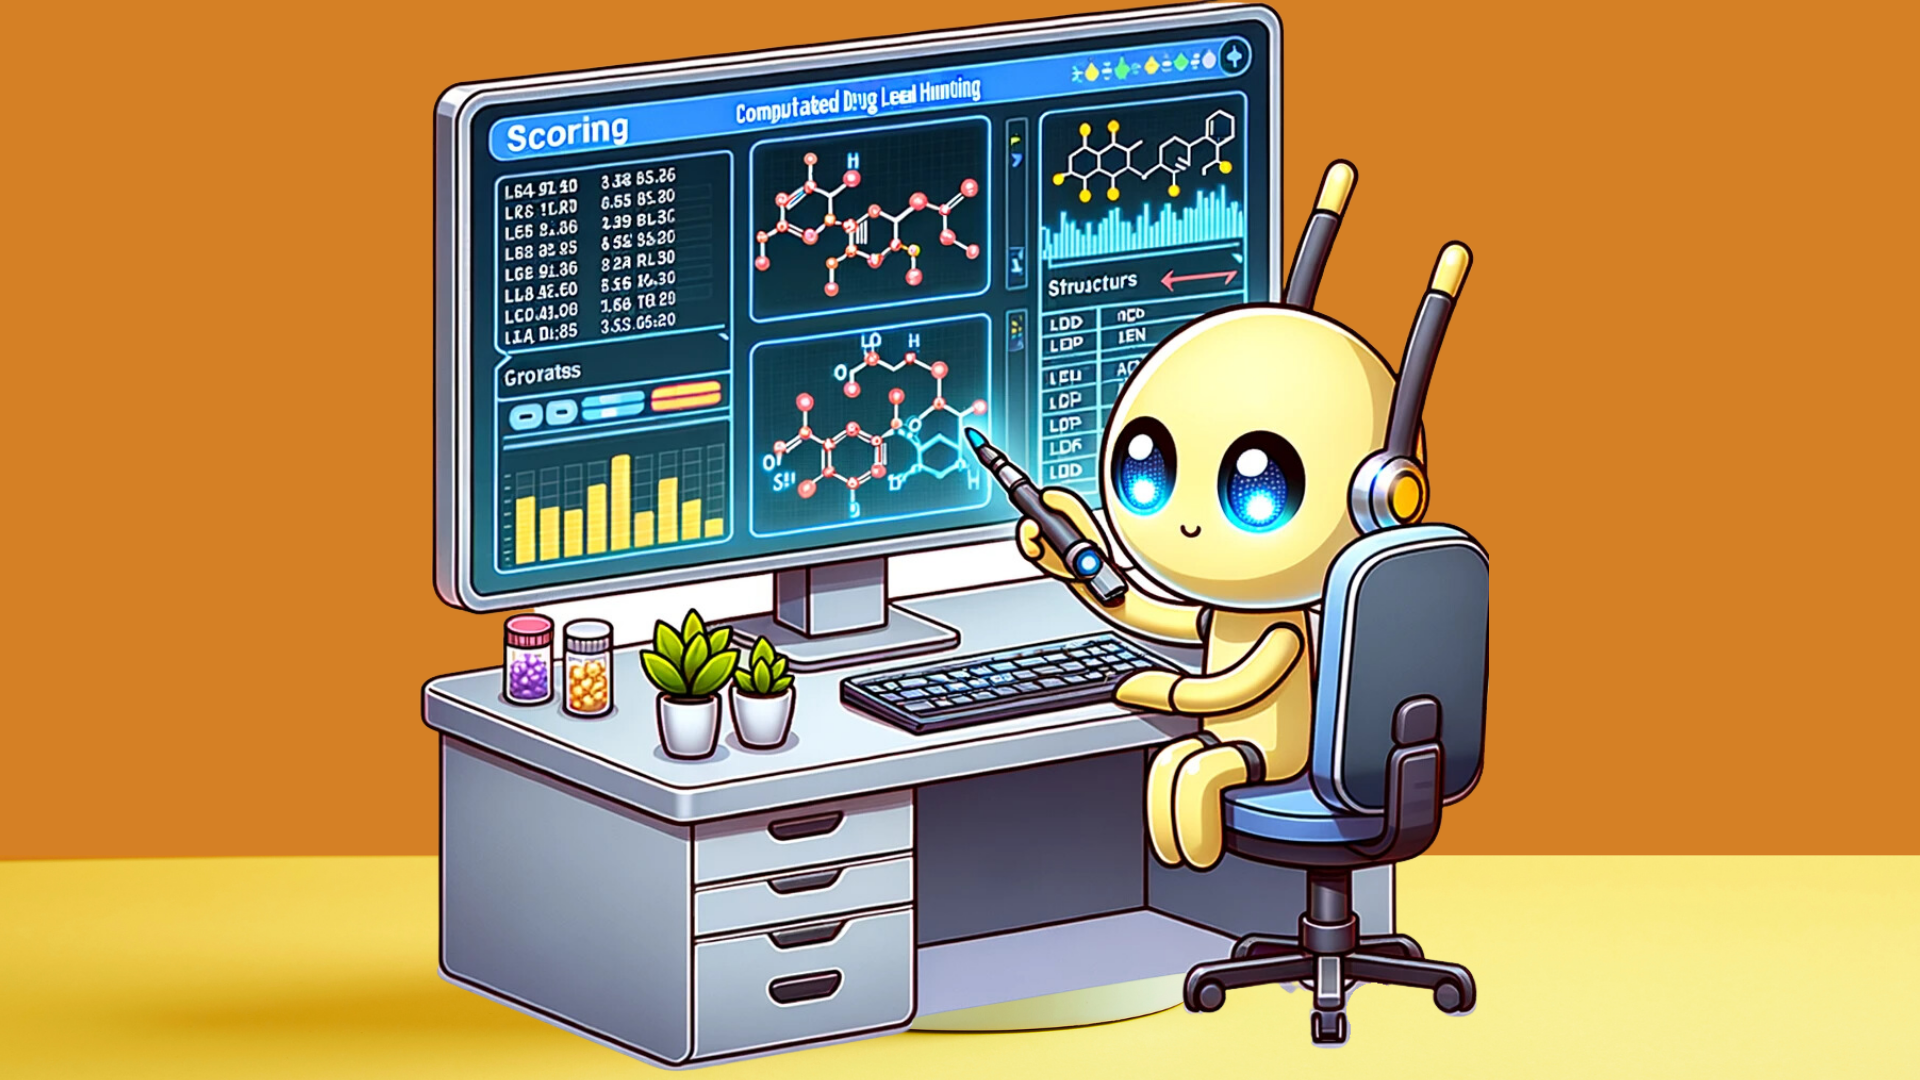

In [ ]:
# @title Default title text
from IPython.display import Image
Image(filename='scoring.png')


We have loaded the dataset into a pandas DataFrame and displayed its first few rows above. Next, we will proceed to calculate a score for each compound based on Lipinski's Rule of Five and the absence of PAINS and Brenk structural alerts.

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/pdpb.csv'
df = pd.read_csv(file_path)



In [ ]:
print("Column Names:")
print(df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("\nFirst Few Rows of the DataFrame:")
print(df.head())

Column Names:
Index(['Unnamed: 0', 'molecule_chembl_id', 'IC50', 'units', 'smiles', 'pIC50',
       'molecular_weight', 'n_hba', 'n_hbd', 'logp', 'PAINS', 'BRENK',
       'PAINS_Type', 'BRENK_Type'],
      dtype='object')

First Few Rows of the DataFrame:
   Unnamed: 0 molecule_chembl_id     IC50 units  \
0           0      CHEMBL4529967  0.00008    nM   
1           1      CHEMBL5202283  0.00008    nM   
2           2      CHEMBL5182195  0.04000    nM   
3           3      CHEMBL4865838  0.05100    nM   
4           4      CHEMBL4862360  0.05800    nM   

                                              smiles      pIC50  \
0  N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)c(Cl)cc...  13.096910   
1  N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)ccc2CN2...  13.096910   
2  Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN[C@H](CCO)C(=O...  10.397940   
3  CS(=O)(=O)c1cncc(COc2nc(O[C@H]3CCc4c(-c5cccc6c...  10.292430   
4  C[C@@](CO)(NCc1cc(Cl)c(O[C@H]2CCc3c(-c4cccc5c4...  10.236572   

   molecular_weight  n_hba  n_hbd 

In [ ]:
# Function to evaluate Lipinski's Rule of Five
def evaluate_lipinski(molecular_weight, logp, n_hbd, n_hba):
    """
    This function evaluates if a compound satisfies Lipinski's Rule of Five.
    The rule is satisfied if there's at most one violation.
    """
    # Counting the number of violations of the Lipinski's rule
    violations = sum([
        molecular_weight > 500,
        logp > 5,
        n_hbd > 5,
        n_hba > 10  # This condition can be adjusted as needed
    ])
    return violations <= 1

# Function to calculate the overall score and Lipinski score of each compound
def calculate_scores(row):
    """
    This function calculates the overall score and Lipinski score of a compound.
    """
    # Evaluating Lipinski's rule
    lipinski = evaluate_lipinski(row['molecular_weight'], row['logp'], row['n_hbd'], row['n_hba'])

    # Evaluating the absence of PAINS and Brenk structural alerts
    pains = row['PAINS'] == 'No'
    brenk = row['BRENK'] == 'No'

    # Weights assigned to each criterion
    weights = {'lipinski': 0.2, 'pains': 0.3, 'brenk': 0.5}

    # Calculating the overall score
    overall_score = sum([
        lipinski * weights['lipinski'],
        pains * weights['pains'],
        brenk * weights['brenk']
    ])

    return pd.Series([overall_score, lipinski * weights['lipinski']], index=['Overall Score', 'Lipinski Score'])

# Calculating the scores for each compound in the DataFrame
df[['Overall Score', 'Lipinski Score']] = df.apply(calculate_scores, axis=1)

# Displaying the DataFrame with the new Score and Lipinski Score columns
df[['molecule_chembl_id', 'PAINS', 'BRENK', 'Lipinski Score', 'Overall Score']].head()


,molecule_chembl_id,PAINS,BRENK,Lipinski Score,Overall Score
0,CHEMBL4529967,No,No,0.0,0.8
1,CHEMBL5202283,No,No,0.0,0.8
2,CHEMBL5182195,No,No,0.0,0.8
3,CHEMBL4865838,No,No,0.0,0.8
4,CHEMBL4862360,No,No,0.0,0.8


We have defined our scoring functions. Now, we will apply these to our dataset to calculate the score for each compound. The score will be based on the compound's adherence to Lipinski's Rule of Five and its absence of PAINS and Brenk structural alerts.

In [ ]:
# Filtering out the compounds with the maximum score
max_score_df = df[df['Score'] == 1]

# Displaying the compounds with the maximum score
max_score_df[['molecule_chembl_id', 'PAINS', 'BRENK','Lipinski Score', 'Score', 'pIC50']]


,molecule_chembl_id,PAINS,BRENK,Lipinski Score,Score,pIC50
8,CHEMBL4092122,No,No,0.2,1.0,9.036212
9,CHEMBL4441950,No,No,0.2,1.0,9.036212
14,CHEMBL4436703,No,No,0.2,1.0,8.657577
15,CHEMBL5176735,No,No,0.2,1.0,8.647817
30,CHEMBL5194902,No,No,0.2,1.0,8.397940
...,...,...,...,...,...,...
556,CHEMBL5079379,No,No,0.2,1.0,4.193142
559,CHEMBL5088466,No,No,0.2,1.0,4.173277
560,CHEMBL5081339,No,No,0.2,1.0,4.154902
565,CHEMBL5083825,No,No,0.2,1.0,3.287350


We can export the results to a CSV file for further analysis and sharing. In Google Colab, the file will be saved to the content folder and can be downloaded from there.

In [ ]:
# Saving the compounds with the maximum score to a CSV file
max_score_file_path = 'compounds_with_max_score.csv'
max_score_df.to_csv(max_score_file_path, index=False)

# Displaying the link to download the CSV file
print(f"Results saved to {max_score_file_path}")


Results saved to compounds_with_max_score.csv


Let's find out which are the top 5.

In [ ]:
# Filtering the DataFrame to only include rows with the maximum score
max_score_df = df[df['Overall Score'] == 1]

# Sorting this filtered DataFrame based on pIC50 value in descending order and getting the top 5
top_5_max_score = max_score_df.sort_values(by='pIC50', ascending=False).head(5)

# Displaying the top 5 compounds with maximum score, ranked by pIC50
top_5_max_score[['molecule_chembl_id', 'PAINS', 'BRENK', 'Lipinski Score', 'Overall Score', 'pIC50']]



,molecule_chembl_id,PAINS,BRENK,Lipinski Score,Overall Score,pIC50
8,CHEMBL4092122,No,No,0.2,1.0,9.036212
9,CHEMBL4441950,No,No,0.2,1.0,9.036212
14,CHEMBL4436703,No,No,0.2,1.0,8.657577
15,CHEMBL5176735,No,No,0.2,1.0,8.647817
30,CHEMBL5194902,No,No,0.2,1.0,8.397940
